# **Assignment 1** (Intro to Machine Learning)

## Note:

* The dataset to be used is `attrition.csv`. This dataset reveals whether a particular employee left the company or not.  
* In this dataset, the column named `Attrition` is the target variable and the remaining columns are features. Please note that `Attrition = 1` means the employee left the company, whereas `Attrition = 0` means the opposite of this statement. 
*  This dataset has been loaded in this assignment as shown below. In case, you are not able to load this data, please note that this data is stored separately as well in the assignment folder. 

In [1]:

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
data_url = "https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/MachineLearning/L1/attrition.csv"
attrition_data = pd.read_csv(data_url)

In [3]:
attrition_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,0
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,1
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,2
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,3
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,4


In [0]:
df = attrition_data 

In [40]:
a=df.select_dtypes(exclude=['int'])
a

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No
...,...,...,...,...,...,...,...
1023,Travel_Rarely,Research & Development,Life Sciences,Female,Research Scientist,Married,No
1024,Travel_Rarely,Research & Development,Medical,Female,Research Director,Married,No
1025,Travel_Rarely,Sales,Medical,Female,Sales Executive,Married,Yes
1026,Travel_Rarely,Sales,Marketing,Male,Sales Executive,Married,No


In [0]:
t=a.columns

In [47]:
t

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object')

In [12]:
a['BusinessTravel'].value_counts()


Travel_Rarely        729
Travel_Frequently    197
Non-Travel           102
Name: BusinessTravel, dtype: int64

In [17]:
#df.BusinessTravel = df.BusinessTravel.apply(lambda x: 0 if x==Travel_Rarely  lambda x: 1 elif x == Travel_Frequently else 2)
df['BusinessTravel'] = df['BusinessTravel'].cat.codes

AttributeError: ignored

In [18]:
print(df.isnull().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
ID        

In [0]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
#df.t =  label_encoder.fit_transform(df.t) 
# Encode labels in column 'species'. 
df['BusinessTravel']= label_encoder.fit_transform(df['BusinessTravel']) 
df['Department']= label_encoder.fit_transform(df['Department']) 
df['EducationField']= label_encoder.fit_transform(df['EducationField']) 
df['Gender']= label_encoder.fit_transform(df['Gender']) 
df['JobRole']= label_encoder.fit_transform(df['JobRole']) 
df['MaritalStatus']= label_encoder.fit_transform(df['MaritalStatus']) 
df['OverTime']= label_encoder.fit_transform(df['OverTime']) 

In [49]:
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID
0,41,1,2,1102,2,1,2,1,1,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,0
1,49,0,1,279,1,8,1,1,1,2,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,1
2,37,1,2,1373,1,2,2,4,1,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,2
3,33,0,1,1392,1,3,4,1,1,5,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,3
4,27,0,2,591,1,2,1,3,1,7,1,1,40,3,1,2,2,1,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,4
5,32,0,1,1005,1,2,2,1,1,8,4,1,79,3,1,2,4,2,3068,11864,0,0,13,3,3,0,8,2,2,7,7,3,6,5
6,59,0,2,1324,1,3,3,3,1,10,3,0,81,4,1,2,1,1,2670,9964,4,1,20,4,1,3,12,3,2,1,0,0,0,6
7,30,0,2,1358,1,24,1,1,1,11,4,1,67,3,1,2,3,0,2693,13335,1,0,22,4,2,1,1,2,3,1,0,0,0,7
8,38,0,1,216,1,23,3,1,1,12,4,1,44,2,3,4,3,2,9526,8787,0,0,21,4,2,0,10,2,3,9,7,1,8,8
9,36,0,2,1299,1,27,3,3,1,13,3,1,94,3,2,0,3,1,5237,16577,6,0,13,3,2,2,17,3,2,7,7,7,7,9


In [0]:
u = df.columns

In [54]:
s = np.std(df.EmployeeCount)
s

0.0

In [0]:
df = df.drop(['EmployeeCount'],axis=1)

In [56]:
df.shape

(1028, 33)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe63fcc6588>,
      dtype=object)

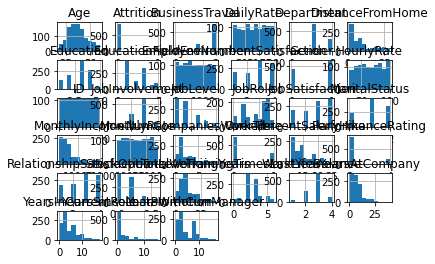

In [58]:

df.hist()

In [59]:
from sklearn import preprocessing 

# here Features - Age and Salary columns  
# are taken using slicing 
# to handle values with varying magnitude 
x = df.iloc[:, [3,17,18]].values 
  
min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1)) 
x_after_min_max_scaler = min_max_scaler.fit_transform(x) 
print ("\nAfter min max Scaling : \n", x_after_min_max_scaler) 


After min max Scaling : 
 [[0.71581961 0.26245392 0.6980526 ]
 [0.12670007 0.21700895 0.9160008 ]
 [0.90980673 0.0569247  0.01212608]
 ...
 [0.98353615 0.16603476 0.52668139]
 [0.35719399 0.43154292 0.85320217]
 [0.21403006 0.12032649 0.06480626]]


In [60]:
Standardisation = preprocessing.StandardScaler() 
x_after_Standardisation = Standardisation.fit_transform(x) 
print ("\nAfter Standardisation : \n", x_after_Standardisation) 


After Standardisation : 
 [[ 0.72619285 -0.13177893  0.74311101]
 [-1.29668704 -0.30959295  1.51354947]
 [ 1.39229303 -0.93595984 -1.68161268]
 ...
 [ 1.64546026 -0.50904135  0.13732042]
 [-0.50523221  0.5298211   1.29155873]
 [-0.99681906 -0.68788558 -1.49539026]]


In [61]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID
0,41,1,2,1102,2,1,2,1,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,0
1,49,0,1,279,1,8,1,1,2,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,1
2,37,1,2,1373,1,2,2,4,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,2
3,33,0,1,1392,1,3,4,1,5,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,3
4,27,0,2,591,1,2,1,3,7,1,1,40,3,1,2,2,1,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,4


In [51]:
print(df.columns.value_counts())

JobInvolvement              1
Education                   1
MonthlyIncome               1
MonthlyRate                 1
JobRole                     1
YearsAtCompany              1
TotalWorkingYears           1
YearsWithCurrManager        1
YearsInCurrentRole          1
PercentSalaryHike           1
OverTime                    1
EmployeeNumber              1
Department                  1
EnvironmentSatisfaction     1
EducationField              1
StockOptionLevel            1
ID                          1
YearsSinceLastPromotion     1
RelationshipSatisfaction    1
Attrition                   1
NumCompaniesWorked          1
DistanceFromHome            1
Age                         1
JobSatisfaction             1
Gender                      1
DailyRate                   1
JobLevel                    1
HourlyRate                  1
TrainingTimesLastYear       1
PerformanceRating           1
MaritalStatus               1
WorkLifeBalance             1
EmployeeCount               1
BusinessTr

## Instructions:

* You are required to use a classifier, which can predict the `Attrition` for the employees. 
* Before implementing any model, you will have to apply suitable encoding to the features and implement exploratory data analysis to know your data better. 
* You can either define your own custom-made classifer or select classifier(s) available in the `scikit-learn`.
* You are supposed to implement a minimum of three classifiers (e.g.  `RandomForestClassifier`, `XGBClassifier`, `DecisionTreeClassifier`, `KNeighborsClassifier`, etc.) and evaluate which one is giving the best peformance. 
* For each of the classifier,  report the accuracy, precision, recall, roc curve, etc. 

In [0]:
label = df['Attrition']
df1 = df.drop(['Attrition'], axis=1)

In [0]:
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier, RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV 
from sklearn.metrics import mean_absolute_error, accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [0]:
X_train, X_test, y_train, y_test = train_test_split(df1, label, train_size=0.8, random_state=123)

In [68]:
from sklearn.model_selection import GridSearchCV

# Defining the classifier 
estimator = xgb.XGBClassifier(
    objective = 'binary:logistic',
    seed = 42
)

# Defining the parameters to be tuned 
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}



# Instantiating the grid search 
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 10,
    verbose=True
)



grid_search.fit(X_train, y_train)
grid_search.best_params_, grid_search.best_score_

Fitting 10 folds for each of 96 candidates, totalling 960 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    8.4s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:   27.6s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:  1.2min
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:  2.2min
[Parallel(n_jobs=10)]: Done 960 out of 960 | elapsed:  2.9min finished


({'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 180},
 0.7950694659134557)

In [69]:
xgb_clf = xgb.XGBClassifier(learning_rate=0.1,max_depth=2,n_estimators=180)
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=180, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [70]:
# Applying classifier on train (seen) set
predictions = xgb_clf.predict(X_train)
# accuracy score
accuracy = accuracy_score(y_train, predictions)
print(np.round(accuracy*100, 2), '%')


93.07 %


In [71]:
# Applying classifier on test (unseen) set
predictions = xgb_clf.predict(X_test)
# accuracy score
accuracy = accuracy_score(y_test, predictions)
print(np.round(accuracy*100, 2), '%')

87.38 %


In [72]:
print(confusion_matrix(y_test, predictions))
print("="*60)
print(classification_report(y_test, predictions))

[[168   4]
 [ 22  12]]
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       172
           1       0.75      0.35      0.48        34

    accuracy                           0.87       206
   macro avg       0.82      0.66      0.70       206
weighted avg       0.86      0.87      0.85       206



In [73]:
from sklearn.metrics import accuracy_score

test_scores, train_scores = [], []
for i in [1, 2, 3, 4, 5, 10, 20, 50]:

    rfc = RandomForestClassifier(n_estimators=i, random_state=1111)
    rfc.fit(X_train, y_train) # print(rfc)

    train_predictions = rfc.predict(X_train)
    test_predictions = rfc.predict(X_test)

    train_scores.append(round(accuracy_score(y_train, train_predictions), 2))
    test_scores.append(round(accuracy_score(y_test, test_predictions), 2))

# Print the train and test scores.
print("The training scores were: {}".format(train_scores))
print("The testing scores were: {}".format(test_scores))
# plot the loss as well 

The training scores were: [0.92, 0.92, 0.96, 0.95, 0.98, 0.98, 0.99, 1.0]
The testing scores were: [0.74, 0.82, 0.76, 0.84, 0.83, 0.85, 0.85, 0.84]


In [74]:
print(confusion_matrix(y_test, test_predictions))
print("="*60)
print(classification_report(y_test, test_predictions))

[[169   3]
 [ 29   5]]
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       172
           1       0.62      0.15      0.24        34

    accuracy                           0.84       206
   macro avg       0.74      0.56      0.58       206
weighted avg       0.82      0.84      0.80       206



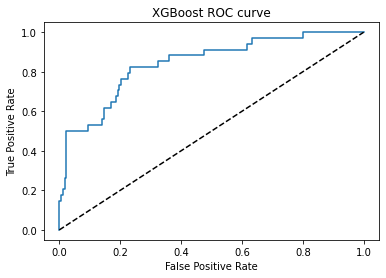

In [75]:
from sklearn.metrics import roc_curve  
probs = xgb_clf.predict_proba(X_test)  
probs = probs[:, 1] 
fper, tper, thresholds = roc_curve(y_test, probs) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC curve')
# show the plot
plt.show()

In [78]:
from sklearn.tree import DecisionTreeClassifier 
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
#print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print(np.round(accuracy*100, 2), '%')

print(confusion_matrix(y_test, y_pred))
print("="*60)
print(classification_report(y_test, y_pred))


75.24 %
[[139  33]
 [ 18  16]]
              precision    recall  f1-score   support

           0       0.89      0.81      0.84       172
           1       0.33      0.47      0.39        34

    accuracy                           0.75       206
   macro avg       0.61      0.64      0.62       206
weighted avg       0.79      0.75      0.77       206



## Resources:

* You might want to refer to the [lecture notebook](https://github.com/shala2020/shala2020.github.io/tree/master/Lecture_Materials/Google_Colab_Notebooks/MachineLearning/L1) for revising the concepts.
* You can also refer to the pre-work material for the first lecture on ML.  